In [56]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

from ipynb.fs.full.functions import compute_ols, compute_ols_intercept, plot_residuals

## Load the data:

In [57]:
data = pd.read_csv('data/tobacco_data.csv')

# Drop columns 'Country' and 'Year', as the former is just and index for rows of data and the later is the same for all.
# We also drop tobacco usage of female in our investigation about males, 


data.drop(['Year', 'Country'], axis=1, inplace=True)

# However, one other approach could be keeping this parameter as a dependent variable and then make the model.

# So now all the parameters are numerical

data.head()

,Price_2015,Tobac_Use_M,Tobac_Use_F,Tax_2015,Happiness_Score,Afford_2015,Ban_Score_Dir_Ads,Ban_Score_Indr_Ads,Ban_Score_add_indir_ads,Warn_Score,Ban_Score_places
0,1.905,51.2,7.6,65.195,4.959,3.920,8,8,3,50.0,8
1,2.220,29.5,18.4,75.045,6.574,1.310,7,10,5,50.0,8
2,1.370,52.3,1.5,34.165,4.350,3.945,5,2,0,50.0,3
3,15.850,16.7,13.1,58.515,7.284,2.285,6,2,0,83.0,6
4,6.060,35.5,34.8,74.835,7.200,1.225,7,8,5,65.0,2


## Statistical preprocessing

### Exploring the descriptive statistics of the variables

In [58]:
# Descriptive statistics are very useful for initial exploration of the variables
# By default, only descriptives for the numerical variables are shown
# To include the categorical ones, you should specify this with an argument include='all', 
# However, we have handeled the categorical features and made score for each.
# As it can be seen, we have also handled the Nan values. 
# So for each feature of each row of data we have value in the table.
 
data.describe()


,Price_2015,Tobac_Use_M,Tobac_Use_F,Tax_2015,Happiness_Score,Afford_2015,Ban_Score_Dir_Ads,Ban_Score_Indr_Ads,Ban_Score_add_indir_ads,Warn_Score,Ban_Score_places
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,3.615388,33.366990,11.729126,55.865243,5.586816,4.549126,6.330097,5.563107,3.058252,55.779150,4.543689
std,3.224972,12.935514,10.371725,22.005910,1.118552,4.340402,2.202442,3.126954,2.428690,14.703264,3.031782
min,0.355000,8.900000,0.200000,7.580000,3.340000,0.550000,0.000000,0.000000,0.000000,20.000000,0.000000
25%,1.080000,22.750000,2.700000,36.255000,4.683500,1.770000,6.000000,3.000000,1.000000,50.000000,1.000000
50%,2.545000,31.500000,8.300000,62.000000,5.360000,2.760000,7.000000,6.000000,3.000000,55.000000,5.000000
75%,4.675000,43.000000,19.700000,75.217500,6.539500,4.815000,8.000000,8.000000,5.000000,65.000000,8.000000
max,15.850000,76.200000,39.700000,85.990000,7.587000,19.600000,8.000000,10.000000,7.000000,90.000000,8.000000


### Exploring the Probability Distribution Functions (PDFs)

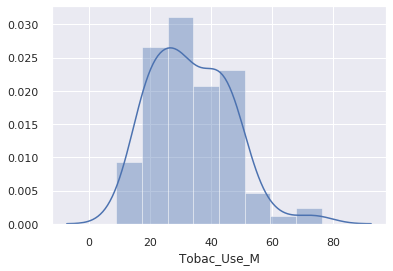

In [59]:
# A great step in the data exploration is to display the probability distribution function (PDF) of a variable
# The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature
sns.distplot(data['Tobac_Use_M'])

As it's ilustrated with PDF, the distribution is slightly skewed right. One solution is to drop the top outliers, but we'll postpone it to the end of our investigation as it's not much significant.

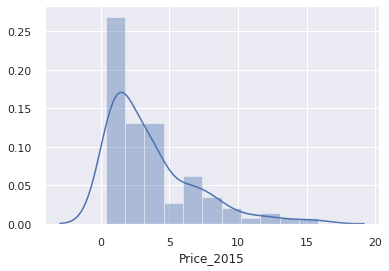

In [60]:
sns.distplot(data['Price_2015'])

The distribution is skewed a little to left. It seems some outliers that could be removed.

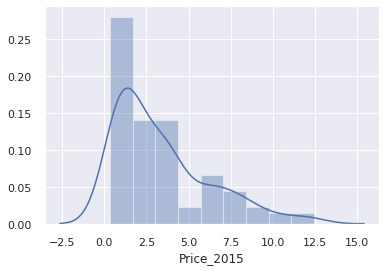

In [61]:
# Outliers are a great issue for OLS, thus we must deal with them in some way
# It may be a useful exercise to try training a model without removing the outliers

# Let's declare a variable that will be equal to the 99th percentile of the 'Afford_2015' variable
q = data['Price_2015'].quantile(0.99)
# Then we can create a new df, with the condition that all Tobac_Use_M must be below the 99 percentile of 'Afford_2015'
data_1 = data[data['Price_2015']<q]
# In this way we have essentially removed the top 1% of the data about 'Afford_2015'
data_1.describe(include='all')
sns.distplot(data_1['Price_2015'])

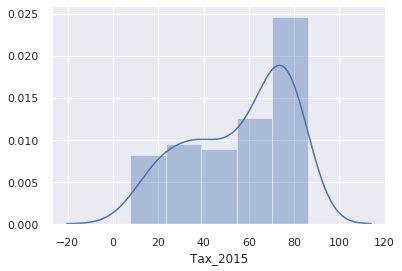

In [62]:
sns.distplot(data_1['Tax_2015'])

Again the distribution is a little skewed left this time, but this time it's not because of outliers and so could be ignored. 

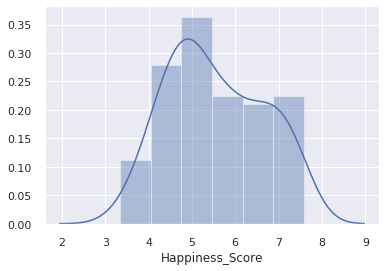

In [63]:
sns.distplot(data_1['Happiness_Score'])

This time, the data seems fairly distributed.

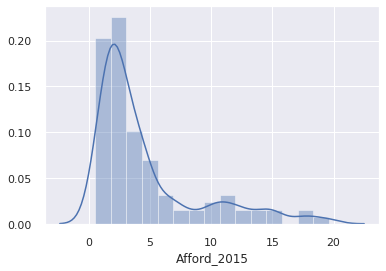

In [64]:
sns.distplot(data_1['Afford_2015'])

Data is obviously skewed right and so droping the outlier seems indispensible.

### Dealing with outliers

In [65]:

# Outliers are a great issue for OLS, thus we must deal with them in some way
# It may be a useful exercise to try training a model without removing the outliers

# Let's declare a variable that will be equal to the 99th percentile of the 'Afford_2015' variable
q = data_1['Afford_2015'].quantile(0.99)
# Then we can create a new df, with the condition that all Tobac_Use_M must be below the 99 percentile of 'Afford_2015'
data_2 = data_1[data_1['Afford_2015']<q]
# In this way we have essentially removed the top 1% of the data about 'Afford_2015'
data_2.describe(include='all')

,Price_2015,Tobac_Use_M,Tobac_Use_F,Tax_2015,Happiness_Score,Afford_2015,Ban_Score_Dir_Ads,Ban_Score_Indr_Ads,Ban_Score_add_indir_ads,Warn_Score,Ban_Score_places
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,3.433687,33.757576,11.733333,56.257677,5.578556,4.313283,6.303030,5.494949,3.010101,55.426792,4.464646
std,2.831257,12.945034,10.463571,22.089786,1.091719,3.901031,2.233577,3.108165,2.409568,14.164293,3.048295
min,0.355000,8.900000,0.300000,7.580000,3.340000,0.550000,0.000000,0.000000,0.000000,20.000000,0.000000
25%,1.080000,23.300000,2.700000,37.632500,4.690000,1.770000,6.000000,3.000000,1.000000,50.000000,1.000000
50%,2.545000,31.600000,7.900000,62.750000,5.360000,2.760000,7.000000,6.000000,3.000000,55.000000,5.000000
75%,4.352500,43.300000,19.700000,75.400000,6.495000,4.750000,8.000000,8.000000,5.000000,65.000000,8.000000
max,12.420000,76.200000,39.700000,85.990000,7.587000,17.335000,8.000000,10.000000,7.000000,85.000000,8.000000


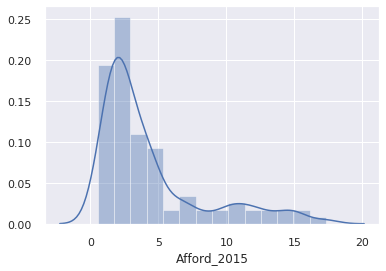

In [66]:
sns.distplot(data_2['Afford_2015'])

The distribution is not still normal, but slightly better.

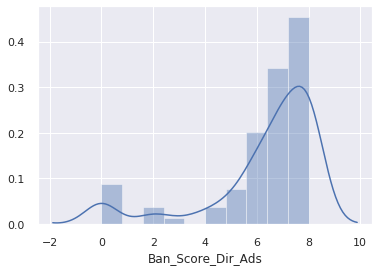

In [67]:
sns.distplot(data_2['Ban_Score_Dir_Ads'])

This time the left skewness is ovious. So to remove least outlires, we do as:

In [68]:
q = data_2['Ban_Score_Dir_Ads'].quantile(0.01)

data_3 = data_2[data_2['Ban_Score_Dir_Ads']>q]

data_3.describe(include='all')

,Price_2015,Tobac_Use_M,Tobac_Use_F,Tax_2015,Happiness_Score,Afford_2015,Ban_Score_Dir_Ads,Ban_Score_Indr_Ads,Ban_Score_add_indir_ads,Warn_Score,Ban_Score_places
count,92.000000,92.000000,92.000000,92.00000,92.00000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,3.547174,33.347826,12.140217,57.44000,5.62162,4.078859,6.782609,5.836957,3.228261,56.374103,4.565217
std,2.886237,12.223158,10.695938,21.94870,1.11260,3.823184,1.443638,2.928740,2.358540,13.831716,3.075262
min,0.355000,8.900000,0.300000,7.58000,3.34000,0.550000,2.000000,0.000000,0.000000,20.000000,0.000000
25%,1.090000,23.175000,2.750000,41.48750,4.76450,1.766250,6.000000,3.000000,1.000000,50.000000,1.000000
50%,2.837500,31.800000,8.100000,66.10000,5.45300,2.657500,7.000000,6.000000,3.000000,60.000000,5.000000
75%,5.093750,43.150000,20.050000,75.81125,6.57425,4.407500,8.000000,8.000000,5.000000,65.000000,8.000000
max,12.420000,70.200000,39.700000,85.99000,7.58700,17.335000,8.000000,10.000000,7.000000,85.000000,8.000000


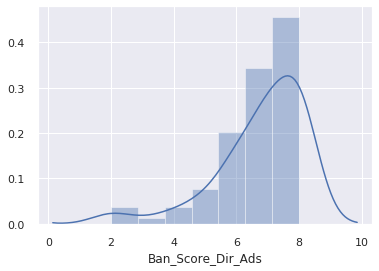

In [69]:
sns.distplot(data_3['Ban_Score_Dir_Ads'])

So we'll have slightly better result by removeing outliers from bottom of data.

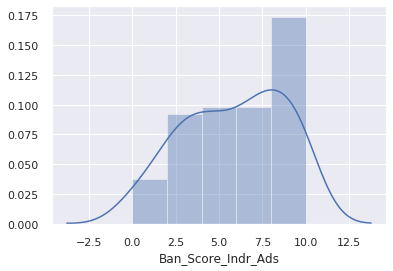

In [70]:
sns.distplot(data_3['Ban_Score_Indr_Ads'])

Fairly normally distributed.

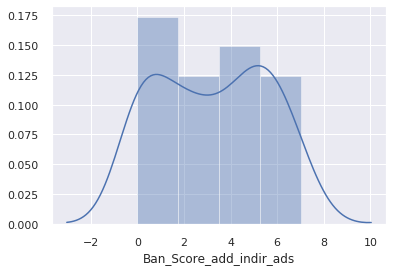

In [71]:
sns.distplot(data_3['Ban_Score_add_indir_ads'])

Fairly normally distributed.

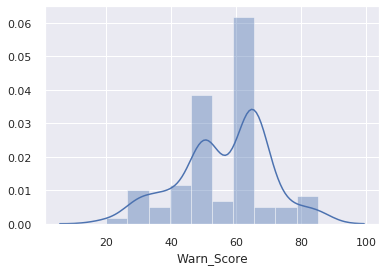

In [72]:
sns.distplot(data_3['Warn_Score'])

Fairly normally distributed.

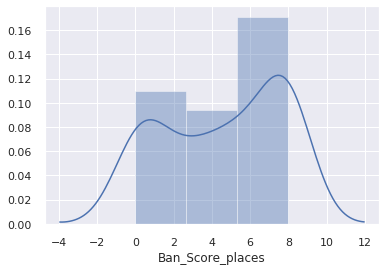

In [73]:
sns.distplot(data_3['Ban_Score_places'])

Fairly normally distributed.

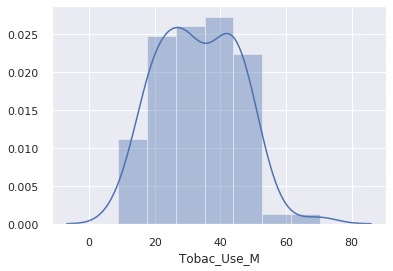

In [85]:
# Checking the distribution of tobaco usage for males again, shows us fairly normal distribution.
data_cleaned = data_3
sns.distplot(data_cleaned['Tobac_Use_M'])

Data distribution is well normalized aftre removing outliers.

#### Make inputs and targets

In [86]:
y_m = data_cleaned['Tobac_Use_M']

# Keep all columns
cols = ['Price_2015',
        'Tax_2015',
        'Happiness_Score', 'Afford_2015', 'Ban_Score_Dir_Ads',
        'Ban_Score_Indr_Ads', 'Ban_Score_add_indir_ads', 'Warn_Score',
        'Ban_Score_places']

# Instantiate x
x = data_cleaned[cols]

### Regresion model:
We investigate two different models. In the first investigation, we consider the intercept, which means there are considerable parameters which are not included in the model. This model will result in more realistic results but in the most cases not much promising. However, if we ignore the intercept and consider our data as the complete possible data in zero state of our perception about the subject, we get more promissing model fits data.
In the real world we should consider both sides. We reach the realistic overview about the situation and what we don't know and cannot change and then investigate the model without bias to optimize it as well based on our known facts and data.

## Consider Intercept

In [77]:
# Model with intercept and all features.
res_f_intercept = compute_ols_intercept(x, y_m)

print("Male results considering intercept:")
print(res_f_intercept.summary())

Male results considering intercept:
                            OLS Regression Results                            
Dep. Variable:            Tobac_Use_M   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     7.446
Date:                Mon, 30 Mar 2020   Prob (F-statistic):           7.16e-08
Time:                        21:26:17   Log-Likelihood:                -332.87
No. Observations:                  92   AIC:                             685.7
Df Residuals:                      82   BIC:                             711.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

/home/andrew/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


##### Results:

As can be seen by p-values, the constant value, tax, happiness, and affordability are the significant parameters.

The constant value fairly stands for some parameters which are not included in the study, and it seems those are significantly important. 

** Significand treshold is 0.05

##### The error investigation:

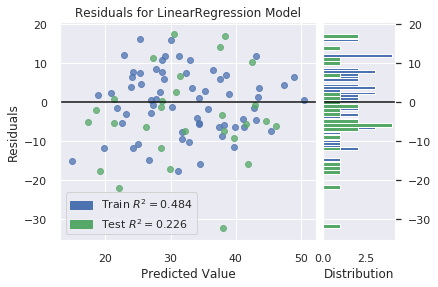

In [78]:
plot_residuals(x, y_m, 'Male_residual_errors', standard=True)

The residual diagram shows fairly noraml distribution and, the comparison between train and test shows the improvement in values for test, which means the model works well on data.

#### Remove not-significant parameters:

In [79]:
# Keep just significant parameters
cols = ['Tax_2015',
           'Happiness_Score', 'Afford_2015', ]

# Instantiate x
x_rem = data_cleaned[cols]

# Model with intercept and significant features.
res_f_intercept = compute_ols_intercept(x_rem, y_m)

print("Male results considering intercept with significant features:")
print(res_f_intercept.summary())

Male results considering intercept with significant features:
                            OLS Regression Results                            
Dep. Variable:            Tobac_Use_M   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     16.31
Date:                Mon, 30 Mar 2020   Prob (F-statistic):           1.63e-08
Time:                        21:26:34   Log-Likelihood:                -340.00
No. Observations:                  92   AIC:                             688.0
Df Residuals:                      88   BIC:                             698.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

/home/andrew/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


#### Result: 

The significant indicators are not changed. Althought the difference between R-squared valud and Adjusted R-squared is decreased, the overall value for both parameters are detriorated, so we can keep the insignificant indicators as controllers.

##### The error investigation:

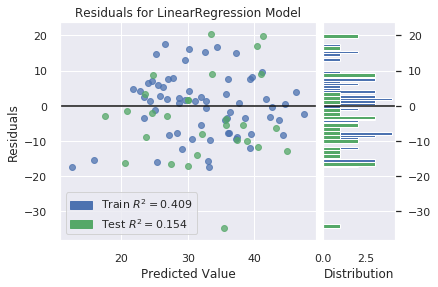

In [80]:
plot_residuals(x_rem, y_m, 'Male_residual_errors', standard=True)

#### Result:
The error is lower than what we had before removing the non significant indicators.

### Checking the OLS assumptions

#### Linearity

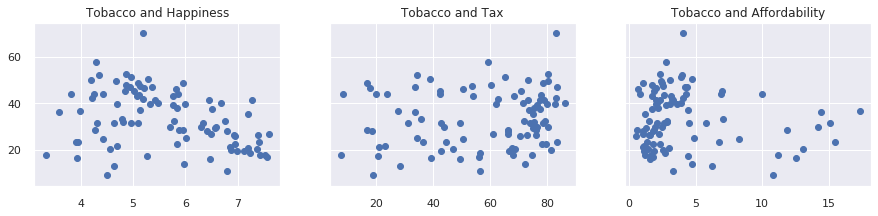

In [95]:
# Here we use some matplotlib code
# Use plt.scatter() for each of them (with your current knowledge)
# But since Tobaco_Use_M is the 'y' axis of all the plots, it made sense to plot them side-by-side (so we can compare them)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Happiness_Score'],data_cleaned['Tobac_Use_M'])
ax1.set_title('Tobacco and Happiness')
ax2.scatter(data_cleaned['Tax_2015'],data_cleaned['Tobac_Use_M'])
ax2.set_title('Tobacco and Tax')
ax3.scatter(data_cleaned['Afford_2015'],data_cleaned['Tobac_Use_M'])
ax3.set_title('Tobacco and Affordability')


plt.show()

The scatter plots show fairly linear relation between tobacco consumption and the significant indicators.

#### Homoscedasticity
The normal distribution of error satisfy homoscelasticity criteria for linear regression.

#### Multicollinearity

In [118]:
# Let's quickly see the columns of our data frame
data_cleaned.columns.values

array(['Price_2015', 'Tobac_Use_M', 'Tobac_Use_F', 'Tax_2015',
       'Happiness_Score', 'Afford_2015', 'Ban_Score_Dir_Ads',
       'Ban_Score_Indr_Ads', 'Ban_Score_add_indir_ads', 'Warn_Score',
       'Ban_Score_places', 'log_Tobac_Use_M'], dtype=object)

In [119]:
# sklearn does not have a built-in way to check for multicollinearity
# one of the main reasons is that this is an issue well covered in statistical frameworks and not in ML ones
# surely it is an issue nonetheless, thus we will try to deal with it

# Here's the relevant module
# full documentation: http://www.statsmodels.org/dev/_modules/statsmodels/stats/outliers_influence.html#variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = data_cleaned[['Afford_2015','Tax_2015','Happiness_Score']]

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

In [120]:
# Let's explore the result
vif

,VIF,Features
0,1.694707,Afford_2015
1,9.371032,Tax_2015
2,10.424759,Happiness_Score


Both Tax and happiness are candidates to be ommited. Remove them and run the model again.

In [121]:
# Keep just significant parameters
cols = ['Afford_2015']

# Instantiate x
x_rem = data_cleaned[cols]

# Model with intercept and significant features.
res_f_intercept = compute_ols_intercept(x_rem, y_m)

print("Male results considering intercept with significant features:")
print(res_f_intercept.summary())

Male results considering intercept with significant features:
                            OLS Regression Results                            
Dep. Variable:            Tobac_Use_M   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.363
Date:                Tue, 31 Mar 2020   Prob (F-statistic):              0.246
Time:                        02:02:21   Log-Likelihood:                -359.66
No. Observations:                  92   AIC:                             723.3
Df Residuals:                      90   BIC:                             728.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

/home/andrew/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


#### Not autocorrelation
The Durbin-watson value in the summary of linear regression is around 2 which shows there is no autocorrelation between erros.

### Descriptive investigation
The only remained regressor that remained is affordability. But, the R-values shows the weakness of model to give us any patern of behaviour. So it's better to keep the  tax and happiness as before if we have considered the intercept in our model.

## No Intercept

It means, we have ignored all unknown prarmeters and assumed system in zero state at first, without any bias. But, we know that constant (bias) is a significant parameter in the model. So this investigation just show us how much we cand infer from our data by keeping all bias information away or simply ignore them and assume the system in zero-state.

In [81]:
# Model without intercept but with all features.
res_m_without = compute_ols(x, y_m)

print("Male results without considering intercept:")
print(res_m_without.summary())

Male results without considering intercept:
                                 OLS Regression Results                                
Dep. Variable:            Tobac_Use_M   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.890
Method:                 Least Squares   F-statistic:                              83.66
Date:                Mon, 30 Mar 2020   Prob (F-statistic):                    7.83e-38
Time:                        21:26:47   Log-Likelihood:                         -352.68
No. Observations:                  92   AIC:                                      723.4
Df Residuals:                      83   BIC:                                      746.1
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.

##### Results:
Firstly we can see that the R-squared and ajdusted R-squared are much improved. 
However, the significant parameters are changed. The happiness and affordability should be removed, on the other side the ban on advertisement and price should be added. We can explain it in zero state as, incentive and deterrent parmeters for tobacco consumption. Which means, in zero state the happiness and affordability are not a deterrent but avoiding the advertisement and price of tobacco are improtant factors in customer sight.

##### The error investigation:

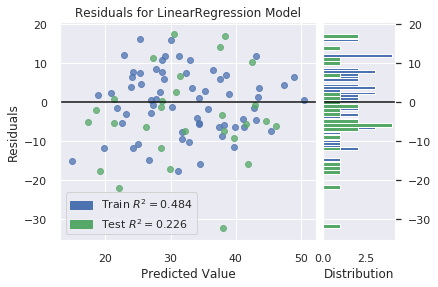

In [82]:
plot_residuals(x, y_m, 'Male_residual_errors', standard=True)

The difference between squared residuals of train and test data set is sensational. Which can be assumed as underfitting.

In [83]:
# Keep significant columns
cols = ['Price_2015','Tax_2015', 'Ban_Score_Dir_Ads']

# Instantiate x
cleaned_x = data_cleaned[cols]

# Model without intercept but with significant features.
res_m_without = compute_ols(cleaned_x, y_m)

print("Male results without considering intercept:")
print(res_m_without.summary())

Male results without considering intercept:
                                 OLS Regression Results                                
Dep. Variable:            Tobac_Use_M   R-squared (uncentered):                   0.885
Model:                            OLS   Adj. R-squared (uncentered):              0.881
Method:                 Least Squares   F-statistic:                              227.3
Date:                Mon, 30 Mar 2020   Prob (F-statistic):                    1.35e-41
Time:                        21:27:38   Log-Likelihood:                         -359.62
No. Observations:                  92   AIC:                                      725.2
Df Residuals:                      89   BIC:                                      732.8
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025   

#### Summary:
Although the R-score is detriorated slightly, but, it's much closer to adjusted R-squared and all remained parameters are significant.

F-statistics shows fairly good modeling with high significance. The negative coeficient of Price indicates its negative impact on tobacco consumption which is the only deterant factor. However, the positive coeficient of direct advertisement ban and tax should be investigated in more precise study.

##### The error investigation:

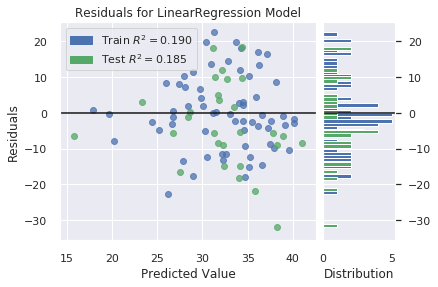

In [84]:
plot_residuals(cleaned_x, y_m, 'Male_residual_errors', standard=True)

The error of train and test are decreased and much close to each other, so the model is working well without bias and non-significant indicators.

## Checking the OLS assumptions

#### Linearity

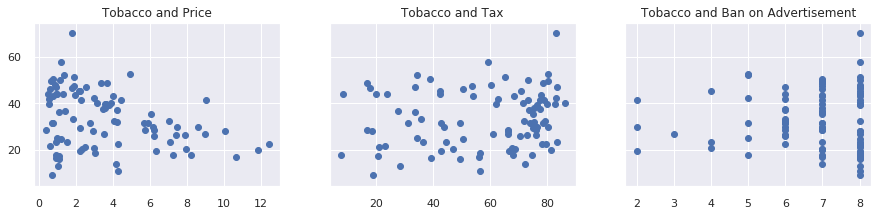

In [87]:
# Here we use some matplotlib code
# Use plt.scatter() for each of them (with your current knowledge)
# But since Tobaco_Use_M is the 'y' axis of all the plots, it made sense to plot them side-by-side (so we can compare them)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Price_2015'],data_cleaned['Tobac_Use_M'])
ax1.set_title('Tobacco and Price')
ax2.scatter(data_cleaned['Tax_2015'],data_cleaned['Tobac_Use_M'])
ax2.set_title('Tobacco and Tax')
ax3.scatter(data_cleaned['Ban_Score_Dir_Ads'],data_cleaned['Tobac_Use_M'])
ax3.set_title('Tobacco and Ban on Advertisement')


plt.show()

The scatter plots show fairly linear relation between tobacco consumption and the significant indicators.

#### Homoscedasticity
The normal distribution of error satisfy homoscelasticity criteria for linear regression.

#### Not autocorrelation
The Durbin-watson value in the summary of linear regression is around 2 which shows there is no autocorrelation between erros.

#### Multicollinearity

In [100]:
# Let's quickly see the columns of our data frame
data_cleaned.columns.values

array(['Price_2015', 'Tobac_Use_M', 'Tobac_Use_F', 'Tax_2015',
       'Happiness_Score', 'Afford_2015', 'Ban_Score_Dir_Ads',
       'Ban_Score_Indr_Ads', 'Ban_Score_add_indir_ads', 'Warn_Score',
       'Ban_Score_places', 'log_Tobac_Use_M'], dtype=object)

In [107]:
# sklearn does not have a built-in way to check for multicollinearity
# one of the main reasons is that this is an issue well covered in statistical frameworks and not in ML ones
# surely it is an issue nonetheless, thus we will try to deal with it

# Here's the relevant module
# full documentation: http://www.statsmodels.org/dev/_modules/statsmodels/stats/outliers_influence.html#variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = data_cleaned[['Price_2015','Tax_2015','Ban_Score_Dir_Ads']]

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

In [108]:
# Let's explore the result
vif

,VIF,Features
0,2.030093,Price_2015
1,2.030093,Ban_Score_Dir_Ads


### Repeat the with new data

In [116]:
# Since Tax_2015 has the highest VIF, I will remove it from the model
# This will drive the VIF of other variables down!!! 
# So even if EngineV seems with a high VIF, too, once 'Tax' is gone that will no longer be the case
cols = ['Price_2015', 'Ban_Score_Dir_Ads']

# Instantiate x
data_no_multicollinearity = data_cleaned[cols]

# Model without intercept but with significant features.
res_m_without = compute_ols(data_no_multicollinearity, y_m)

print("Male results without considering intercept:")
print(res_m_without.summary())

Male results without considering intercept:
                                 OLS Regression Results                                
Dep. Variable:            Tobac_Use_M   R-squared (uncentered):                   0.850
Model:                            OLS   Adj. R-squared (uncentered):              0.847
Method:                 Least Squares   F-statistic:                              255.5
Date:                Tue, 31 Mar 2020   Prob (F-statistic):                    7.82e-38
Time:                        01:58:17   Log-Likelihood:                         -371.59
No. Observations:                  92   AIC:                                      747.2
Df Residuals:                      90   BIC:                                      752.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025   

### Results: 
Price is not significant.

In [117]:
# Keep significant columns
cols = ['Ban_Score_Dir_Ads']

# Instantiate x
cleaned_x = data_cleaned[cols]

# Model without intercept but with significant features.
res_m_without = compute_ols(cleaned_x, y_m)

print("Male results without considering intercept:")
print(res_m_without.summary())

Male results without considering intercept:
                                 OLS Regression Results                                
Dep. Variable:            Tobac_Use_M   R-squared (uncentered):                   0.850
Model:                            OLS   Adj. R-squared (uncentered):              0.849
Method:                 Least Squares   F-statistic:                              516.4
Date:                Tue, 31 Mar 2020   Prob (F-statistic):                    2.79e-39
Time:                        01:58:30   Log-Likelihood:                         -371.60
No. Observations:                  92   AIC:                                      745.2
Df Residuals:                      91   BIC:                                      747.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025   

### Descriptive investigation
Yes! the final result is that we can just count on bans over advertisement. This is what the governments can do and what is in their hand. However, we should consider this results is obtained with much simplifying the model and without considering unknown parameters which are included in the bias. 